<a href="https://colab.research.google.com/github/lucia1970-student/GA-PyTorch/blob/main/Supervised_KMeans%2B%2B_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
cd /content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet

/content/drive/MyDrive/Colab Notebooks/cours_python/FSCI2610/projet


In [30]:
#Autism prognosis using voice biomarkers.

#Dataset from study below.  Available on request.
# https://www.nature.com/articles/s41398-023-02554-8#Fig2

#I am proposing ALL characteristics of voice biomarkers (19) and 2 target
#classes (CTRL (no TD) and ASD) in order to classify data.
#The purpose of this iteration is to validate the study results.
#The validation steps are detailed below:

#1. Selecting ALL characteristicss and 2 classes ('ASD' and 'TD') as per study's
#identified characteristics and classes.  The 19 characteristics have been ranked
# with Recursive Feature Elimination (RFE).  No characteristics were eliminated at
# this stage.

#2. Applied feature rankings and applied  dimension reduction with RFE and PCA.
# PCA components = 4 @ 99% coverage.  84 rows out 108, no rows were eliminated.

#3. Split dataset into train/test (70%/30%) with StratifiedShuffleSplit and ran
#multiple randomized folds of KMeans++ with k=2 while mapping clustering_labels
#to actual values (Ground Truth) for each and finally computing ROC_AUC score
# on the mapped results.  Many metrics for each foldis being shown.

#4 Ploted the average ROC_AUC curve and plotted the confusion matrix.

#5. As comparison, I have applied a ShuffleSplit cross-validation of SVC.
#and displayed performance results.

import numpy as np

#Load data.
import pandas as pd
df=pd.read_csv("voice_data.csv")
data=df.copy()
display.max_columns = None
display.nax_rows = None
display(data)
display(data.columns)

a = np.count_nonzero(data.Group == 'TD')
b = td_count = np.count_nonzero(data.Group == 'IC')
c = td_count = np.count_nonzero(data.Group == 'SLI')
d = np.count_nonzero(data.Group == 'ASD')
z = a + b + c
print('CTRL count including TD (-24): ', z)
print('ASD count: ', d)
display(data.value_counts())


,Group,avg_f0,avg_F1,avg_F2,avg_F3,avg_F4,mean_hnr,jitter,shimmer,dispersion_formantique,avg_f0_k,mean_hnr_k,jitter_k,shimmer_k,dispersion_formantique_k,avg_f0_s,mean_hnr_s,jitter_s,shimmer_s,dispersion_formantique_s
0,ASD,304.75,778.00,2245.60,3571.05,5081.95,10.75,1.958567,1.377360,1434.650000,4.120596,6.512729,4.430703,2.066858,5.193159,1.026296,1.519206,1.205160,-0.259522,0.069057
1,ASD,294.45,662.70,1939.90,3251.25,4775.30,12.25,1.663247,1.389308,1370.866667,2.278845,3.440682,3.091686,3.108758,2.927942,0.133170,0.667077,0.560049,-0.244830,-0.390032
2,ASD,255.85,884.55,2183.50,3513.75,5111.40,12.90,1.422039,1.185426,1408.950000,1.737850,5.391922,2.999970,3.019235,2.481138,0.169958,1.548892,0.722608,-0.348192,0.175821
3,ASD,292.75,652.05,2022.60,3177.75,4634.10,8.65,1.729150,1.645441,1327.350000,8.688811,2.620909,2.320086,2.652073,2.249446,-2.098723,-0.134290,0.045519,0.452664,0.225971
4,ASD,305.75,739.75,2294.25,3706.60,4807.55,8.30,2.033454,1.544171,1355.933333,3.761873,3.485672,3.841500,7.036189,3.318189,0.993320,0.670789,1.151768,-1.606129,-0.338201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,TD,255.05,858.95,2223.80,3384.55,4787.25,9.75,1.111741,1.302515,1309.433333,5.190369,3.365465,1.875519,3.242620,1.881098,1.338850,0.806779,0.273689,-0.246472,0.152368
104,TD,265.00,1022.95,2350.50,3596.25,4973.85,9.80,2.340409,1.299065,1316.966667,3.619754,6.548035,8.302562,2.789693,4.012588,1.028263,1.752227,2.363517,0.612808,0.451664
105,TD,266.45,762.45,2278.70,3557.60,4742.95,10.95,1.489093,1.517415,1326.833333,2.151113,2.531716,3.208905,2.385634,3.771958,0.114164,0.130736,0.951328,-0.507807,1.004282
106,TD,274.95,873.00,2299.70,3672.65,4917.65,9.35,1.391963,1.264749,1348.216667,3.473041,2.755562,2.825725,2.361107,2.442094,-0.777756,0.412494,0.655506,0.554750,-0.074498


Index(['Group', 'avg_f0', 'avg_F1', 'avg_F2', 'avg_F3', 'avg_F4', 'mean_hnr',
       'jitter', 'shimmer', 'dispersion_formantique', 'avg_f0_k', 'mean_hnr_k',
       'jitter_k', 'shimmer_k', 'dispersion_formantique_k', 'avg_f0_s',
       'mean_hnr_s', 'jitter_s', 'shimmer_s', 'dispersion_formantique_s'],
      dtype='object')

CTRL count including TD (-24):  70
ASD count:  38


Group  avg_f0  avg_F1   avg_F2   avg_F3   avg_F4   mean_hnr  jitter    shimmer   dispersion_formantique  avg_f0_k  mean_hnr_k  jitter_k  shimmer_k  dispersion_formantique_k  avg_f0_s  mean_hnr_s  jitter_s   shimmer_s  dispersion_formantique_s
ASD    135.35  988.15   2393.45  3640.05  4875.60  4.90      1.490435  1.602262  1295.816667             7.724096  3.591570    5.565571  7.160721   1.632535                  2.314049   0.899021    1.875244   2.080483   0.021249                   1
SLI    267.15  950.75   2354.50  3420.55  4681.85  9.80      1.222840  1.100797  1243.700000             3.163465  2.026336    2.003743  2.851964   2.089819                  0.824082   0.472550    0.358002   0.339679  -0.061841                   1
       300.80  769.60   2079.05  3331.15  4790.55  14.15     0.790875  1.102135  1340.316667             3.220332  2.145983    2.468427  2.772546   3.880961                  1.094163   0.190177    0.845510   0.510875   0.261225                   1
       300.30  1001.35  2518.35  3970.90  5302.25  13.30     1.498298  1.501590  1433.633333             3.677679  2.536378    4.656360  5.951269   3.461849                  0.711598   0.362425    1.380237   0.763329   0.567253                   1
       291.35  1029.95  2440.60  3591.35  4955.00  10.15     1.155211  1.010466  1308.350000             6.415412  6.520670    2.538592  2.137952   2.184312                  1.744851   1.761442    0.915314   0.059145   0.006798                   1
                                                                                                                                                                                                                                                     ..
ASD    335.30  668.75   2005.45  3214.50  4607.80  9.60      1.705673  1.562046  1313.016667             3.668807  3.216171    2.332092  3.348500   2.970892                  0.467641   0.735932    0.271600  -0.835370  -0.251010                   1
       334.10  684.90   2094.30  3579.70  4856.10  11.30     2.190127  1.458687  1390.400000             3.270168  2.770940    2.156335  2.384491   3.616185                  0.073779   0.540132   -0.271603  -0.347822   0.721927                   1
       331.95  779.30   2271.30  3687.00  4806.70  9.30      1.989887  1.514565  1342.466667             3.788538  2.111079    3.193975  3.715863   2.814807                  0.336245  -0.508081    0.757273   1.094934   0.379331                   1
       325.80  773.75   2243.80  3530.95  4862.85  8.50      2.070477  1.697217  1363.033333             8.262409  2.766723    2.527389  2.369298   2.733893                  2.055750  -0.081247    0.729531  -0.299465   0.665008                   1
TD     319.55  1073.60  2495.70  3786.50  4988.30  7.70      1.153545  1.174254  1304.900000             2.853541  2.986775    4.395455  2.258666   2.654484                  0.807288  -0.228113    1.250874   0.182217   0.282963                   1
Name: count, Length: 108, dtype: int64

In [47]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()

from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of the DataFrame before filtering and modifying it
df_filtered = df[df['Group'] != 'TD'].copy()
df_filtered.loc[(df_filtered.Group == 'IC') | (df_filtered.Group == 'SLI'), 'Group'] = 'CTRL'

y = df_filtered.Group
X = df_filtered.iloc[:, 1:]

print(y.unique(), ", no TD")
print(X.count())

['ASD' 'CTRL'] , no TD
avg_f0                      84
avg_F1                      84
avg_F2                      84
avg_F3                      84
avg_F4                      84
mean_hnr                    84
jitter                      84
shimmer                     84
dispersion_formantique      84
avg_f0_k                    84
mean_hnr_k                  84
jitter_k                    84
shimmer_k                   84
dispersion_formantique_k    84
avg_f0_s                    84
mean_hnr_s                  84
jitter_s                    84
shimmer_s                   84
dispersion_formantique_s    84
dtype: int64


First 4 best features:  ['x0' 'x7' 'x14' 'x16']


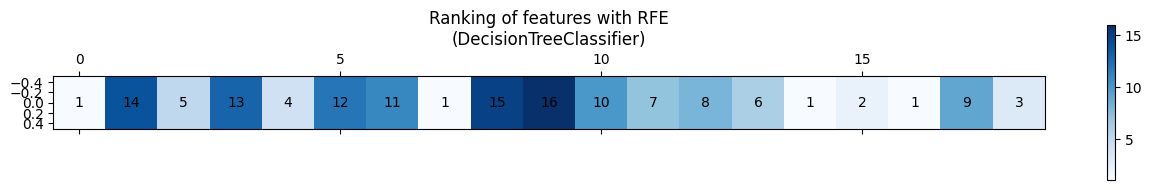


y:  84

X:  84


In [56]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

y_ = LabelEncoder().fit_transform(y)
X_ = StandardScaler().fit_transform(X)

#estimator = SVR(kernel="linear")
#estimator = LogisticRegression()
estimator = DecisionTreeClassifier()
pipe = Pipeline(
    [
        ("rfe", RFE(estimator=estimator, n_features_to_select=4, step=1)),
    ]
)

pipe.fit(X_, y_)

print("First 4 best features: ", pipe.get_feature_names_out())

ranking = pipe.named_steps["rfe"].ranking_
ranking = ranking.reshape(1, -1)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)

# Add annotations for pixel numbers
for i in range(ranking.shape[0]):
    for j in range(ranking.shape[1]):
        plt.text(j, i, str(ranking[i, j]), ha="center", va="center", color="black")

plt.colorbar()
plt.title("Ranking of features with RFE\n(DecisionTreeClassifier)")
plt.show()

print('\ny: ' , len(y))
print('\nX: ', len(X))

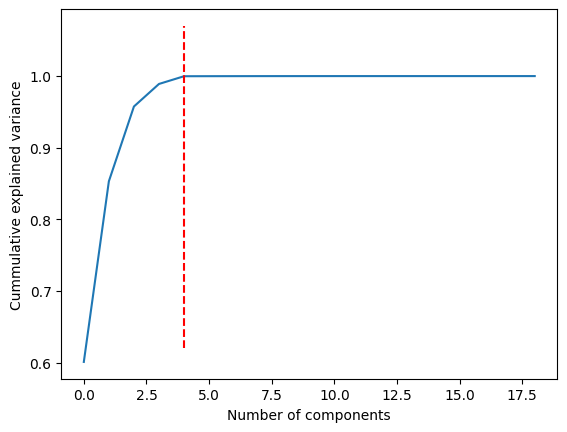

In [57]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
my = np.array(np.arange(0.62, 1.1, 0.15))
mx = np.array([4]*(len(my)))
plt.plot(mx,my,c='red', linestyle='--')
plt.ylabel('Cummulative explained variance')
plt.show()


In [58]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

pca.n_components = 4
X = pca.fit_transform(X)
print("Explained Variance Ratio: ", sum(pca.explained_variance_ratio_))

y = LabelEncoder().fit_transform(y)
X = StandardScaler().fit_transform(X)

display(len(X))
display(y)

Explained Variance Ratio:  0.9890077247677216


84

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import  StratifiedKFold, StratifiedShuffleSplit
from scipy.stats import mode
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, silhouette_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Initialize StratifiedShuffleSplit Cross-Validation
strat_shuffle_split = StratifiedShuffleSplit(n_splits=400, test_size=0.3, random_state=84)

# Store ROC values, scores and thresholds for averaging
tprs = []
mean_fpr = np.linspace(0, 1, 100)
thresholds=[]
accuracy_scores = []

# Store confusion matrices
conf_matrices = []
optimalthreshold = 0.9
kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10, random_state=0)

for i, (train_index, test_index) in enumerate(strat_shuffle_split.split(X, y)):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    X_train, X_test = X[train_index], X[test_index] # Use indices to split X data
    y_train, y_test = y[train_index], y[test_index] # Use indices to split y data

    # Encode y_train and y_test to numerical labels
    #y_train_encoded = le.fit_transform(y_train)
    #y_test_encoded = le.transform(y_test)

    print("******************************")

    # Apply K-Means++ Clustering
    kmeans.fit_transform(X_train)
    cluster_labels = kmeans.fit_predict(X_train)

    # Map Cluster Labels to Ground Truth Labels
    # Ensure that mapping creates at least two unique labels
    # Check the distribution of y_train within each cluster to determine the appropriate mapping
    mapping = {}
    for j in np.unique(cluster_labels):
        # Get the most frequent ground truth label within the cluster
        #most_frequent_label = mode(y_train[cluster_labels == j], keepdims=True).mode[0]
        # Use encoded y_train for mode calculation
        most_frequent_label = mode(y_train[cluster_labels == j], keepdims=True).mode[0]
        # If the most frequent label is already in the mapping and it's the same as the current cluster
        #  then assign a different label to ensure at least two unique labels
        if most_frequent_label in mapping.values() and list(mapping.keys())[list(mapping.values()).index(most_frequent_label)] != j:
            # Assign the opposite label (1 if most frequent is 0, and vice versa)
            mapping[j] = 1 - most_frequent_label
        else:
            mapping[j] = most_frequent_label

    mapped_preds = np.vectorize(mapping.get)(kmeans.predict(X_train))

    # Ensure mapped_preds and y_test only contain 0 and 1
    #This will force the labels to be binary
    mapped_preds = np.where(mapped_preds > 1, 1, mapped_preds)
    # Use encoded y_test for comparison
    y_test_encoded = np.where(y_test > 1, 1, y_test)
    y_train_encoded = np.where(y_train > 1, 1, y_train) # Ensure y_train is also binary

    #Display fold performance results
    print(f"Fold {i+1}: \n")
    print("\nCluster Labels: \n", cluster_labels)
    print("\nKMeans++ Score: \n", kmeans.score(X_train))
    print("\nMapping predictions: \n", mapped_preds)
    print("\nGround Truth: \n", y_test_encoded) # Use encoded y_test
    # Use encoded y_train for accuracy calculation
    accuracy_score_fold = np.mean(mapped_preds == y_train)
    accuracy_scores.append(accuracy_score_fold)
    print("\nAccuracy Score: ", accuracy_score_fold)
    # Use encoded y_train for classification report
    print("\nClassification Report: \n", classification_report(y_train, mapped_preds))
    # Use encoded y_train for silhouette score
    current_silhouette_score = silhouette_score(X_train, mapped_preds) # Change variable name to avoid overwriting the function
    print("\nSilhouette Score: ", current_silhouette_score)

    # Compute ROC Curve
    # Use encoded y_train for ROC curve calculation
    fpr, tpr, thresholds_kmeans = roc_curve(y_train, mapped_preds)
    roc_auc = auc(fpr, tpr)
    print("\nROC_AUC: ", roc_auc, "\n")

    # Interpolate tpr to have the same length as mean_fpr
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0  # Ensure the curve starts at (0, 0)
    tprs.append(interp_tpr)

    # Store best threshold (Youden’s J statistic)
    j_scores = tpr - fpr  # Maximizing (TPR - FPR)
    best_threshold = thresholds_kmeans[np.argmax(j_scores)]
    thresholds.append(best_threshold)

    # Applying  Decision Function Using Optimal Threshold
    # Compute Distance to Cluster Centroids
    distances = kmeans.transform(X_train)  # Distance to each centroid for test data
    min_distances = np.min(distances, axis=1)  # Min distance to closest cluster

    # Apply Threshold-Based Decision Rule
    predicted_classes = (min_distances < optimalthreshold).astype(int)  # 1 if close, 0 if far

    # Compute Confusion Matrix
    # Use encoded y_train for confusion matrix calculation
    cm = confusion_matrix(y_train, mapped_preds)

    # Ensure confusion matrix is always 2x2
    if cm.shape != (2, 2):
        cm_padded = np.zeros((2, 2), dtype=int)
        cm_padded[:cm.shape[0], :cm.shape[1]] = cm
        cm = cm_padded

    conf_matrices.append(cm)
    print("\nConfusion Matrix: \n", cm)
    print("\n******************************\n")

# Compute Mean ROC Curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

mean_accuracy = np.mean(accuracy_scores)
best_accuracy_index = np.argmax(accuracy_scores)
best_accuracy = accuracy_scores[best_accuracy_index]
print("Mean accuracy score: ", mean_accuracy)
print("Best accuracy score: ", best_accuracy)

# Compute Average Confusion Matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

Streaming output truncated to the last 5000 lines.
******************************
Fold 282: 


Cluster Labels: 
 [0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0]

KMeans++ Score: 
 -196.69734402871367

Mapping predictions: 
 [0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1
 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0]

Ground Truth: 
 [1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0]

Accuracy Score:  0.6379310344827587

Classification Report: 
               precision    recall  f1-score   support

           0       0.57      0.81      0.67        26
           1       0.76      0.50      0.60        32

    accuracy                           0.64        58
   macro avg       0.66      0.65      0.64        58
weighted avg       0.67      0.64      0.63        58


Silhouette Score:  0.1818228579702177

ROC_AUC:  0.653846153846154 


Confusion Matrix: 
 [[21  5]
 [16 16]]

**************

[[16.7075  9.2925]
 [12.0175 19.9825]]
2
2


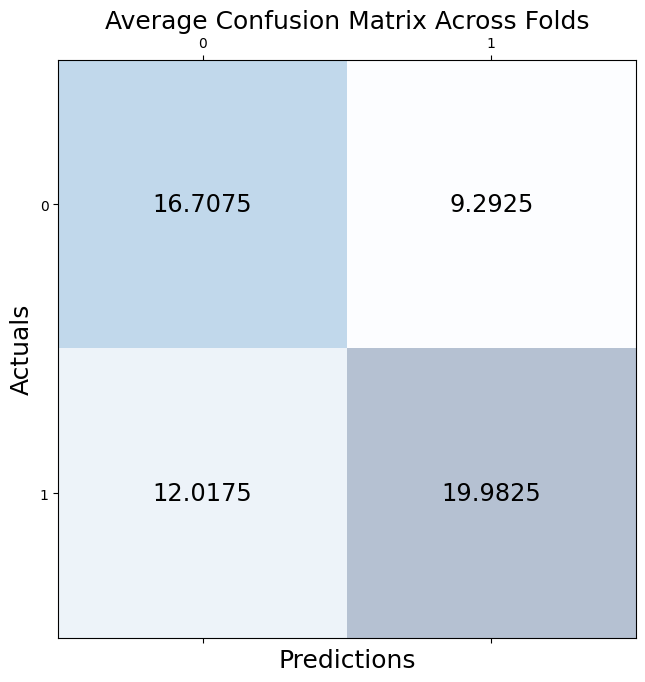

In [60]:
# Displaying KMeans++ confusion matrix for
#2 classes (Groups - ASD and CTRL) - (NO TD))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

c_cm = cm
cm = avg_conf_matrix

print(avg_conf_matrix)
print(cm.shape[0])
print(cm.shape[1])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Average Confusion Matrix Across Folds', fontsize=18)
plt.show()



In [62]:
#Utilisation de SVC Cross-Validation (CV) avec ROC scoring.
import numpy as np
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, classification_report, fowlkes_mallows_score, normalized_mutual_info_score, silhouette_score
from sklearn.model_selection import ShuffleSplit

rs = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

#Creation du SVC pour la classification
model_SVC = SVC(kernel="linear", probability=True, random_state=84)

# Fit KMeans on the training data
model_KMeans = KMeans(n_clusters=2, n_init=10, max_iter=50, init="k-means++", random_state=84)
clustered_labels = model_KMeans.fit_predict(X, y)

#Evaluate clustering
silhouette_avg = silhouette_score(X, clustered_labels)
print("For model_KMeans: \n", model_KMeans.get_params(), "\nThe average silhouette_score is :", silhouette_avg)

# Split train/test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, clustered_labels, test_size=0.3, random_state=84)

# Apply Supervised KMeans classification on clustered training data and perform cross-validation.
scores = cross_val_score(model_SVC, X_train, y_train, cv=rs, verbose=5, scoring='roc_auc')
scores = scores[~np.isnan(scores)]
print("\nSVC classification with cross-validation score: ", np.mean(scores))

#Display results
y_pred = model_SVC.fit(X_train, y_train).predict(X_train)
print("\nAccuracy Score: ", accuracy_score(y_train, y_pred))
print("\nClassification Report: \n", classification_report(y_train, y_pred))

For model_KMeans: 
 {'algorithm': 'lloyd', 'copy_x': True, 'init': 'k-means++', 'max_iter': 50, 'n_clusters': 2, 'n_init': 10, 'random_state': 84, 'tol': 0.0001, 'verbose': 0} 
The average silhouette_score is : 0.17245333833549387
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ...............................

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.9s


[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.972) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=0.972) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s
[CV] END ................................ score: (test=1.000) total time=   0.0s

SVC classification with cross-validation score:  0.9988097041847043

Accuracy Score:  1.0

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00  

[[22  0]
 [ 0 36]]
2
2


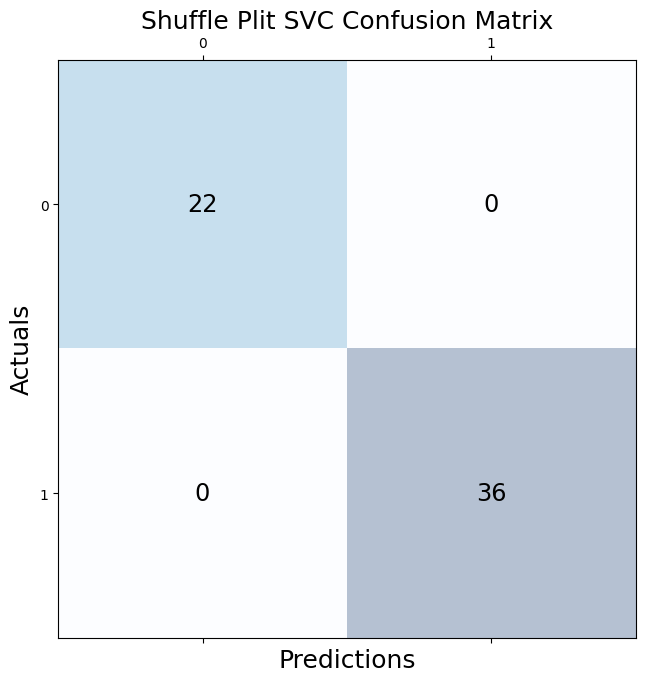

In [63]:
# Displaying KMeans++ confusion matrix for
#2 classes (Groups - ASD and CTRL) - (NO TD))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_train, y_pred)
print(cm)
print(cm.shape[0])
print(cm.shape[1])
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Shuffle Plit SVC Confusion Matrix', fontsize=18)
plt.show()

# Compute Average Confusion Matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

